In [15]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import plot_func as f

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
ds = xr.open_dataset('gridfile_test.nc')
ds2 = xr.open_dataset('erai_regrid_5x5.nc')
obs = xr.open_dataset('../GPS-RO__CP_LR_5x5_2007-2018.nc')

In [18]:
ds_slice_mm = ds.sel(lat=slice(-20,20), time=slice('2007-12-01', '2018-11-30'))
obs_slice_mm = obs.sel(lat = slice(-20,20), time=slice('2007-12-01', '2018-11-30'))
ds2_slice_mm = ds2.sel(lat=slice(-20,20), time=slice('2007-12-01', '2018-11-30'))

In [19]:
ds_slice = ds.sel(lat=slice(-20,20), time=slice('2007-01-01', '2018-12-31'))
obs_slice = obs.sel(lat = slice(-20,20))
ds2_slice = ds2.sel(lat=slice(-20,20), time=slice('2007-01-01', '2018-12-31'))

In [20]:
obs_mon = obs_slice.resample(time='M').mean()

In [21]:
era5_mm = ds_slice_mm.groupby('time.month').mean(dim='time')

erai_mm = ds2_slice_mm.groupby('time.month').mean(dim='time')
obs_mm = obs_slice_mm.groupby('time.month').mean(dim='time')

/uio/hume/student-u62/johanmeh/anaconda3/envs/py36/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [22]:
d_lrz = ds_slice.tpz[:,:,:].mean(axis=0)-obs_mon.LR_z[:,:,:].mean(axis=0)
d_lrt = ds_slice.tpt[:,:,:].mean(axis=0)-obs_mon.LR_T[:,:,:].mean(axis=0)

d2_lrz = ds2_slice.tpz[:,:,:].mean(axis=0)-obs_mon.LR_z[:,:,:].mean(axis=0)
d2_lrt = ds2_slice.tpt[:,:,:].mean(axis=0)-obs_mon.LR_T[:,:,:].mean(axis=0)

obs_mean_lrz = obs_mon.LR_z[:,:,:].mean(axis=0)
obs_mean_lrt = obs_mon.LR_T[:,:,:].mean(axis=0)

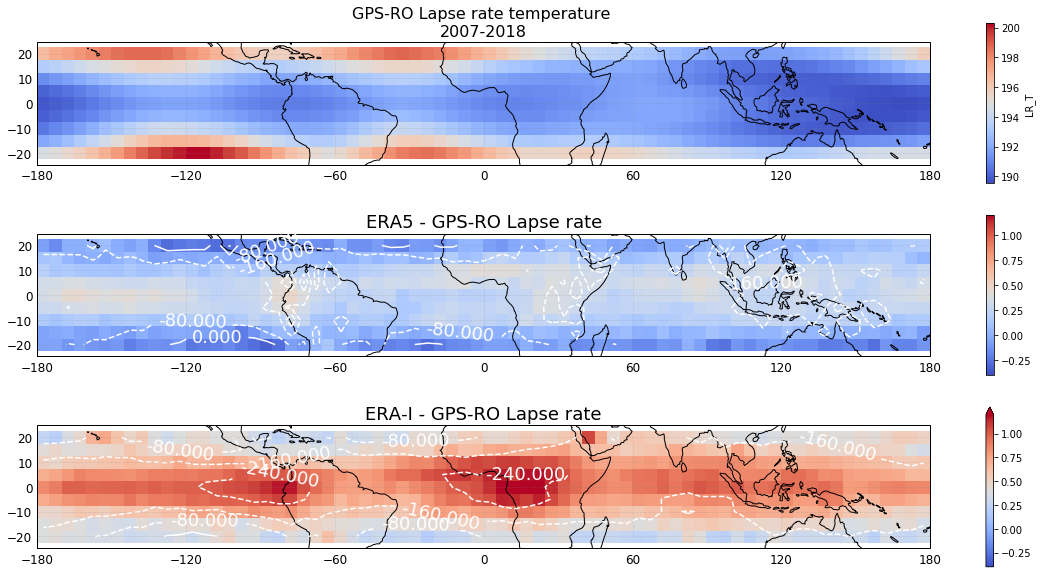

In [35]:
f1 = f.three_plot_contour(obs_mean_lrt, d_lrt, d_lrz*1000, d2_lrt, d2_lrz*1000, 'GPS-RO Lapse rate temperature \n2007-2018', 
                  'ERA5 - GPS-RO Lapse rate', 'ERA-I - GPS-RO Lapse rate', 
                 vmin=-0.4, vmax=1.2)
#f1.savefig('LR_mean_zt.pdf')

In [9]:
d_cpz = ds_slice.ctpz[:,:,:].mean(axis=0)-obs_mon.CP_z[:,:,:].mean(axis=0)
d_cpt = ds_slice.ctpt[:,:,:].mean(axis=0)-obs_mon.CP_T[:,:,:].mean(axis=0)

d2_cpz = ds2_slice.ctpz[:,:,:].mean(axis=0)-obs_mon.CP_z[:,:,:].mean(axis=0)
d2_cpt = ds2_slice.ctpt[:,:,:].mean(axis=0)-obs_mon.CP_T[:,:,:].mean(axis=0)

obs_mean_cpz = obs_mon.CP_z[:,:,:].mean(axis=0)
obs_mean_cpt = obs_mon.CP_T[:,:,:].mean(axis=0)

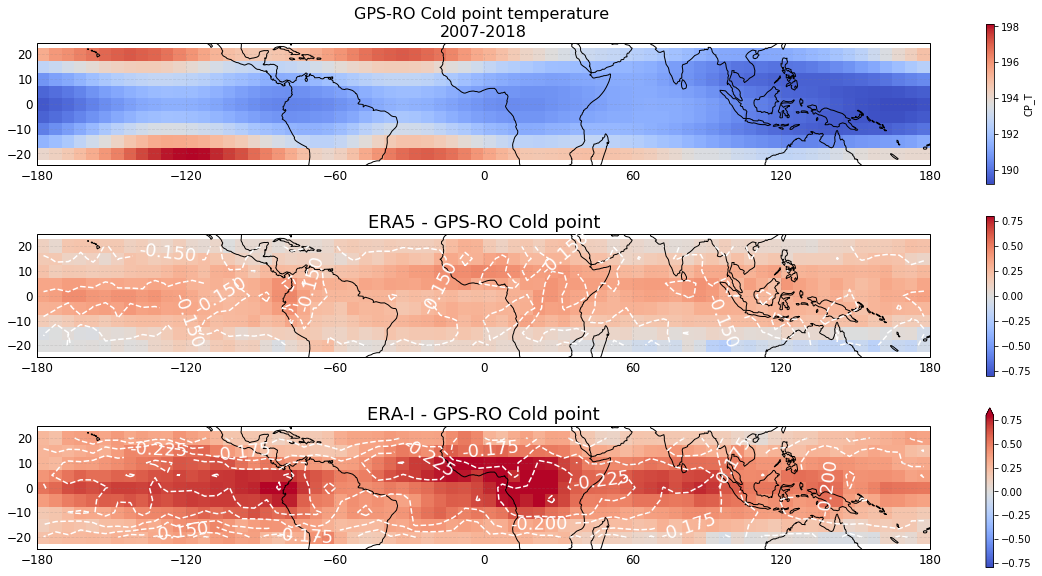

In [40]:
f2 = f.three_plot_contour(obs_mean_cpt, d_cpt, d_cpz, d2_cpt, d2_cpz, 'GPS-RO Cold point temperature \n2007-2018',
                'ERA5 - GPS-RO Cold point', 'ERA-I - GPS-RO Cold point', vmin=-0.8, vmax=0.8)

#f2.savefig('CP_mean_zt.pdf')

ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

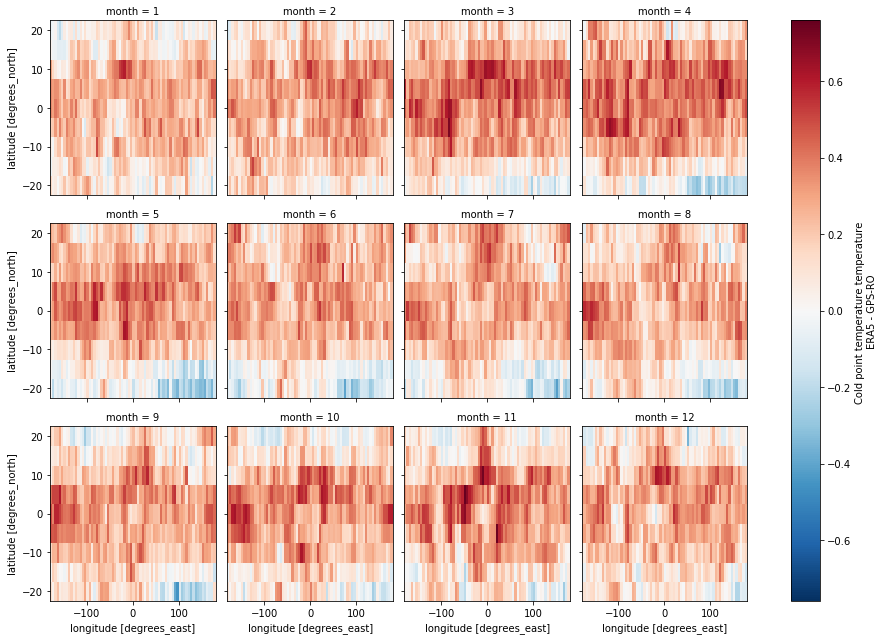

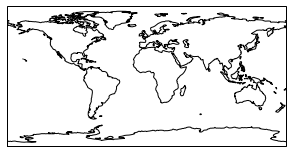

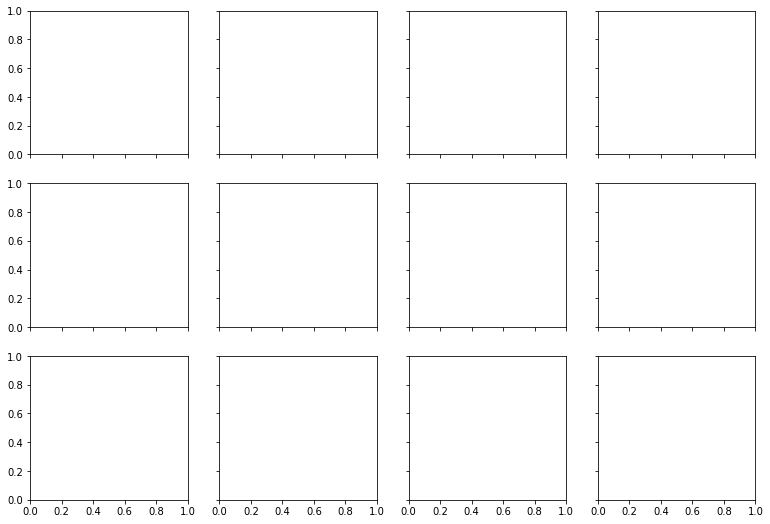

In [43]:
d1 = era5_mm.ctpt[:,:,:] - obs_mm.CP_T[:,:,:]
ss1 = d1.plot.pcolormesh('lon', 'lat', col='month', col_wrap=4, 
                         cbar_kwargs={'label': 'Cold point temperature temperature \nERA5 - GPS-RO'})



map_proj = ccrs.PlateCarree(central_longitude = 0)
data_proj = ccrs.PlateCarree(central_longitude = 0)
geodetic_proj = ccrs.PlateCarree(central_longitude = 0)

fig = plt.figure(figsize=(5,3.25))

ax = fig.add_subplot(111, projection=map_proj)
ax.coastlines()

topo_plot = d1.plot.pcolormesh('lon', 'lat', col='month', col_wrap=4, 
                         cbar_kwargs={'label': 'Cold point temperature temperature \nERA5 - GPS-RO'},
                        levels=[0,200,400,600,800,1000],
                        transform=data_proj)

# add colorbar
axpos = ax.get_position()
cbar_ax = fig.add_axes([axpos.x1+0,axpos.y0,0.03,axpos.height])
cbar = fig.colorbar(topo_plot, cax=cbar_ax)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('elevation (m)', fontsize=12)

#plt.savefig('figs/cpt_era5_monthly_latlon.pdf')

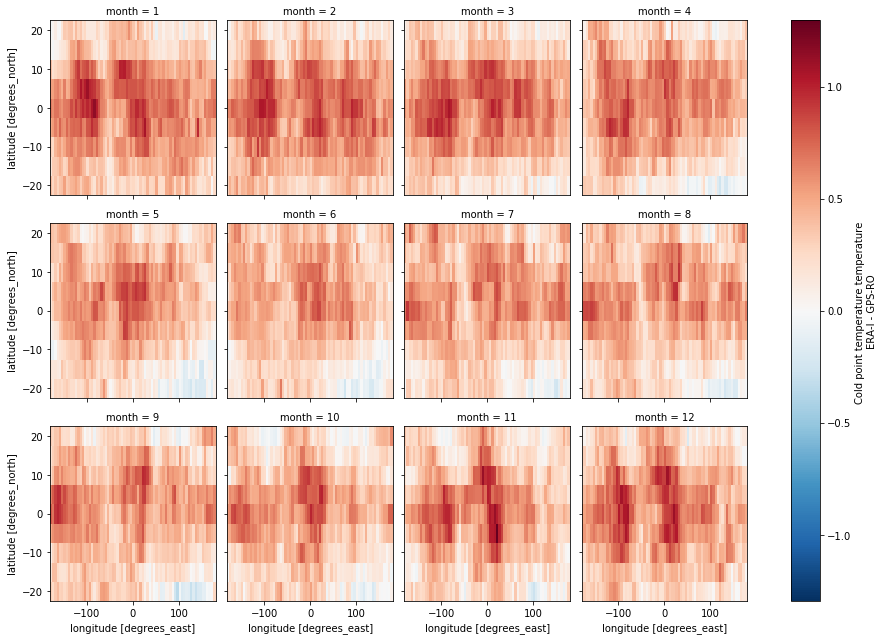

In [30]:
d2 = erai_mm.ctpt[:,:,:] - obs_mm.CP_T[:,:,:]
#d2.plot(x='lon', y='lat', col='month', col_wrap=4)
d22 = d2.plot.pcolormesh('lon', 'lat', col='month', col_wrap=4, 
                         cbar_kwargs={'label': 'Cold point temperature temperature \nERA-I - GPS-RO'})
#plt.savefig('figs/cpt_erai_monthly_latlon.pdf')

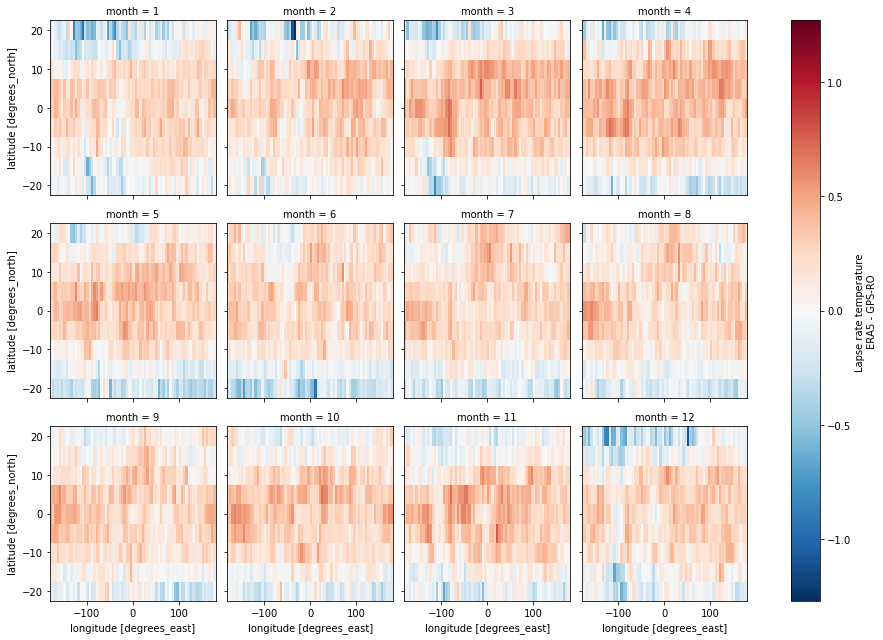

In [12]:
d3 = era5_mm.tpt[:,:,:] - obs_mm.LR_T[:,:,:]
#d3.plot(x='lon', y='lat', col='month', col_wrap=4)

d33 = d3.plot.pcolormesh('lon', 'lat', col='month', col_wrap=4, 
                         cbar_kwargs={'label': 'Lapse rate temperature \nERA5 - GPS-RO'})
#plt.savefig('figs/lrt_era5_monthly_latlon.pdf')

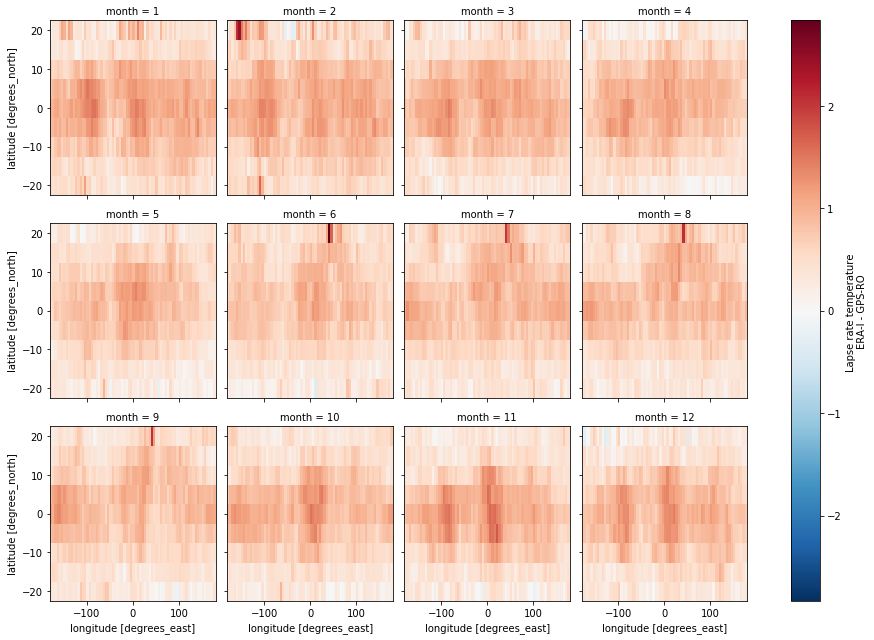

In [13]:
d4 = erai_mm.tpt[:,:,:] - obs_mm.LR_T[:,:,:]
#d4.plot(x='lon', y='lat', col='month', col_wrap=4)

d44 = d4.plot.pcolormesh('lon', 'lat', col='month', col_wrap=4, 
                         cbar_kwargs={'label': 'Lapse rate temperature \nERA-I - GPS-RO'})
#plt.savefig('figs/lrt_erai_monthly_latlon.pdf')

In [58]:
era5_s = ds_slice_mm.groupby('time.season').mean(dim='time')
erai_s = ds2_slice_mm.groupby('time.season').mean(dim='time')
obs_s = obs_slice_mm.groupby('time.season').mean(dim='time')

/uio/hume/student-u62/johanmeh/anaconda3/envs/py36/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


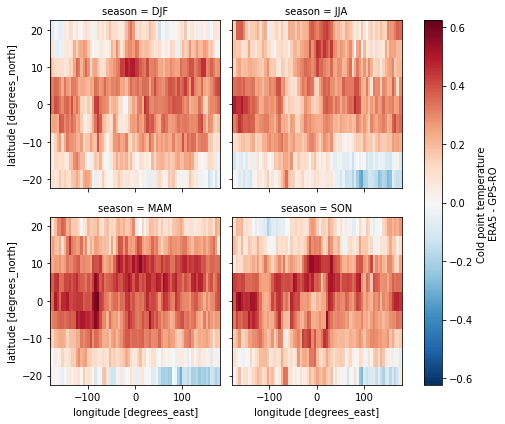

In [59]:
s1 = era5_s.ctpt[:,:,:] - obs_s.CP_T[:,:,:]
ss1 = s1.plot.pcolormesh('lon', 'lat', col='season', col_wrap=2, 
                         cbar_kwargs={'label': 'Cold point temperature \nERA5 - GPS-RO'})


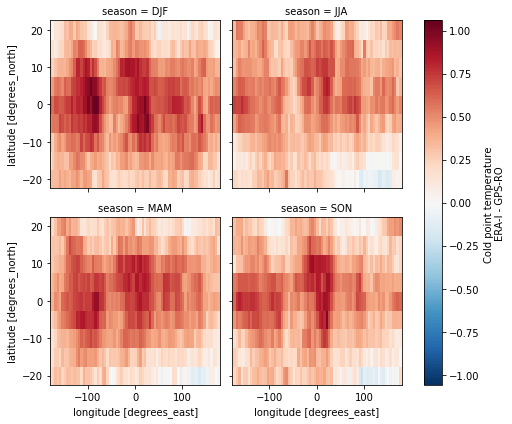

In [60]:
s2 = erai_s.ctpt[:,:,:] - obs_s.CP_T[:,:,:]
ss2 = s2.plot.pcolormesh('lon', 'lat', col = 'season', col_wrap=2, 
                         cbar_kwargs={'label': 'Cold point temperature \nERA-I - GPS-RO'})


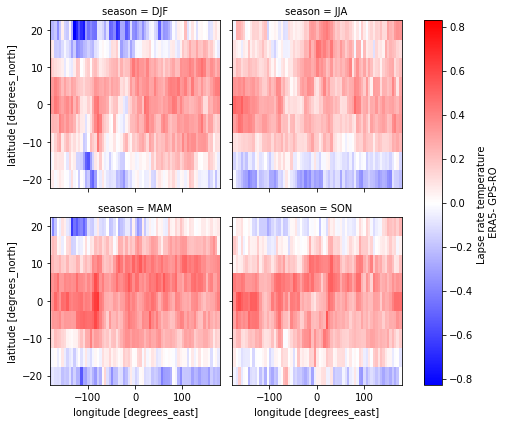

In [61]:
s3 = era5_s.tpt[:,:,:] - obs_s.LR_T[:,:,:]
ss3 = s3.plot.pcolormesh('lon', 'lat', col='season', col_wrap=2, 
                         cbar_kwargs={'label': 'Lapse rate temperature \n ERA5- GPS-RO'}, cmap='bwr')



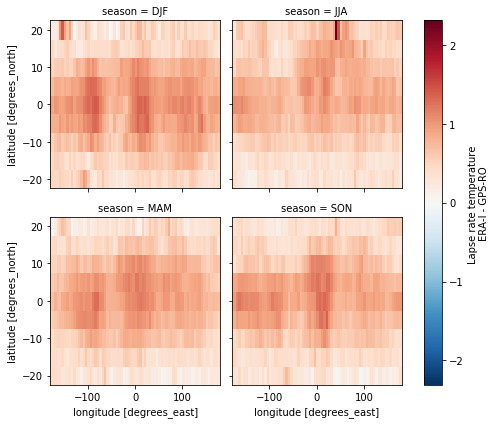

In [62]:
s4 = erai_s.tpt[:,:,:] - obs_s.LR_T[:,:,:]
ss4 = s4.plot.pcolormesh('lon', 'lat', col='season', col_wrap=2, 
                         cbar_kwargs={'label': 'Lapse rate temperature \nERA-I - GPS-RO'})


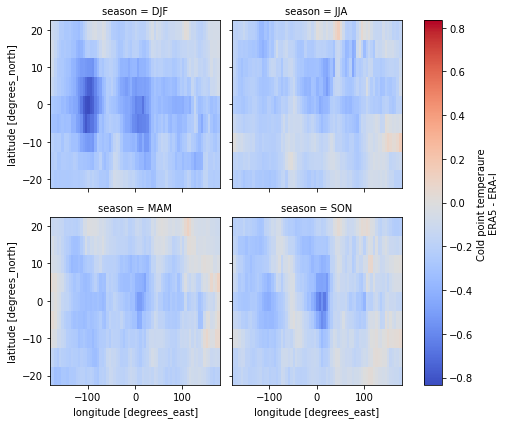

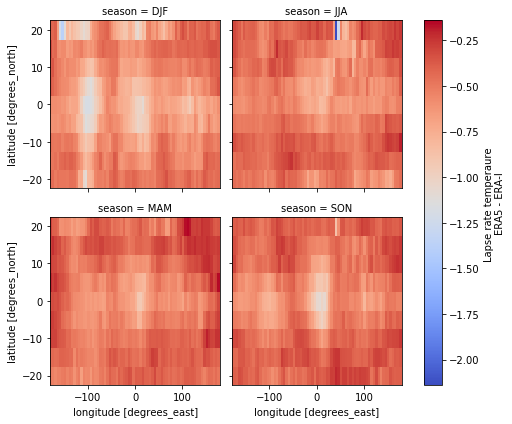

In [63]:
g1 = era5_s.ctpt[:,:,:] - erai_s.ctpt[:,:,:]
g2 = era5_s.tpt[:,:,:] - erai_s.tpt[:,:,:]


gg1 = g1.plot.pcolormesh('lon', 'lat', col='season', col_wrap=2, 
                        cbar_kwargs={'label' : 'Cold point temperaure \nERA5 - ERA-I'}, cmap='coolwarm')

gg2 = g2.plot.pcolormesh('lon', 'lat', col='season', col_wrap=2, 
                        cbar_kwargs={'label' : 'Lapse rate temperaure \nERA5 - ERA-I'}, cmap='coolwarm')


In [64]:
d_cpt_rean = ds_slice.ctpt[:,:,:].mean(axis=0) - ds2_slice.ctpt[:,:,:].mean(axis=0)
d_cptz_rean = ds_slice.ctpz[:,:,:].mean(axis=0) - ds2_slice.ctpz[:,:,:].mean(axis=0)
d_lrt_rean = ds_slice.tpt[:,:,:].mean(axis=0)-ds2_slice.tpt[:,:,:].mean(axis=0)
d_lrtz_rean = ds_slice.tpz[:,:,:].mean(axis=0)-ds2_slice.tpz[:,:,:].mean(axis=0)


In [65]:
f1 = f.three_plot_contour(obs_mean_cpt, d_cpt_rean, d_cptz_rean*1000, d_lrt_rean,d_lrtz_rean*1000, 'GPS-RO CPT', 'ERA5 - ERA-I CPT', 
                  'ERA5 - ERA-I LRT', 
                 vmin=-1.5, vmax=0.6)

AttributeError: 'Figure' object has no attribute 'three_plot_contour'

/uio/hume/student-u62/johanmeh/anaconda3/envs/py36/lib/python3.6/site-packages/xarray/plot/facetgrid.py:365: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


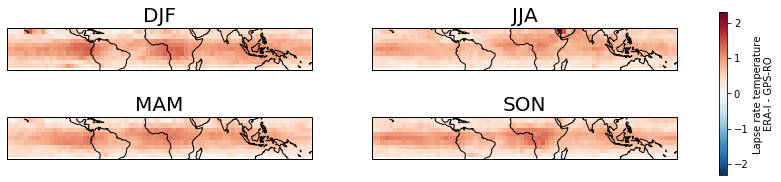

In [154]:
s4 = erai_s.tpt[:,:,:] - obs_s.LR_T[:,:,:]
ss4 = s4.plot( col='season', col_wrap=2,
                         subplot_kws={'projection': ccrs.PlateCarree()},
             cbar_kwargs={'label': 'Lapse rate temperature \nERA-I - GPS-RO'}, figsize=(15,3)
)


ss4.axes.flat[0].set_title('DJF', fontsize=20)
ss4.axes.flat[1].set_title('JJA', fontsize=20)
ss4.axes.flat[2].set_title('MAM', fontsize=20)
ss4.axes.flat[3].set_title('SON', fontsize=20)

for ax in ss4.axes.flat:
    ax.coastlines()
    #ax.gridlines()
    #ax.set_title(['DJF', 'MAM'], fontsize=18)

plt.savefig('test_coastlines_season.pdf')